In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
src = pathlib.Path().cwd().parent.parent / 'data' / 'processed'
ref = pathlib.Path().cwd().parent.parent / 'reference'

In [4]:
ct = pd.read_csv(src / 'ct-from-test-data' / 'ct.csv', index_col='date_sample')
ct_by_awh = pd.read_csv(src / 'ct-by-group-from-test-data' / 'ct-by-awh.csv')
ct_by_adh = pd.read_csv(src / 'ct-by-group-from-test-data' / 'ct-by-adh.csv')
ct_by_sex = pd.read_csv(src / 'ct-by-group-from-test-data' / 'ct-by-sex.csv')
ct_by_ag = pd.read_csv(src / 'ct-by-group-from-test-data' / 'ct-by-ag.csv')
addiv = pd.read_csv(ref / 'addiv.csv')[['id_addiv', 'name_addiv_2']]
pop = pd.read_csv(ref / 'pop_1.csv')[['id_addiv', 'pop']]

In [5]:
# ct_by_awh.head()
# ct_by_adh.head()
# ct_by_ag.head()
# ct.head(15)
# addiv
pop

,id_addiv,pop
0,79,8993082
1,760,142625
2,26734,23258
3,26737,14970
4,26740,10633
...,...,...
342,27670,5637
343,27673,13281
344,27676,4512
345,27679,10715


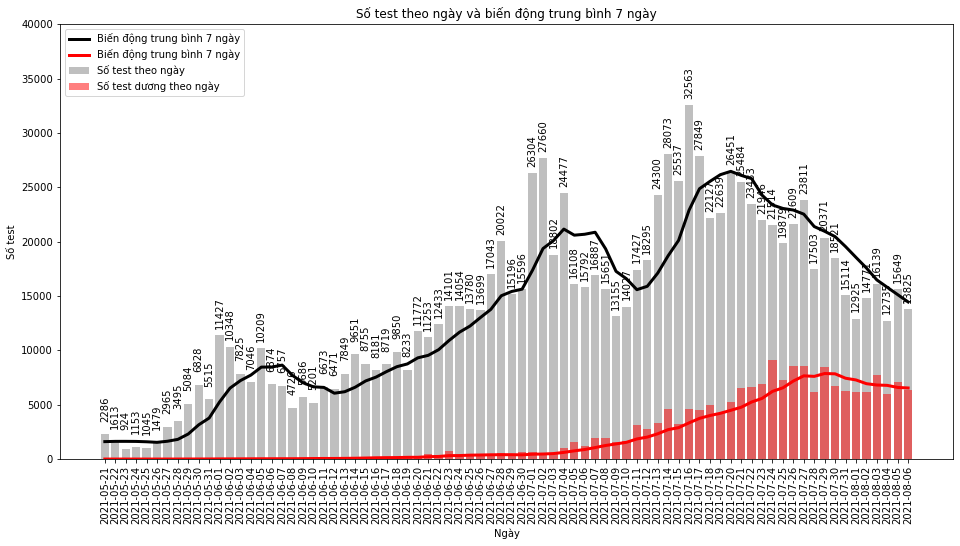

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 3500, y[i].astype('int'), ha='center', va='top', rotation=90)
        
df = (
    ct[ct.index >= '2021-05-27']
)
        
fig, ax = plt.subplots(figsize=(16,8))

# [bar] So test theo ngay
ax.bar(df.index, df.no_test, label='Số test theo ngày', linewidth=3, alpha=0.5, color='gray')
# [line] BDTB so test theo ngay
ax.plot(df.index, df.no_test_rollsum / 7, label='Biến động trung bình 7 ngày', linewidth=3, color='black')

# [bar] So test duong theo ngay
ax.bar(df.index, df.no_positive, label='Số test dương theo ngày', linewidth=3, alpha=0.5, color='red')

# [line] BDTB so test duong theo ngay
ax.plot(df.index, df.no_positive_rollsum / 7, label='Biến động trung bình 7 ngày', linewidth=3, color='red')

ax.set_ylabel('Số test')
ax.set_ylim([0, 40000])
ax.set_xlabel('Ngày')
ax.set_xticks(df.index)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Số test theo ngày và biến động trung bình 7 ngày')
ax.legend(loc='upper left')
addlabels(df.index, df.no_test)

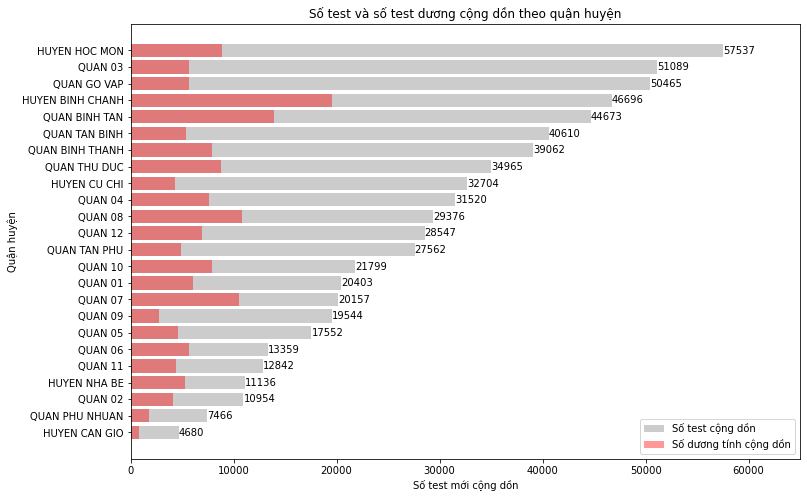

In [7]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y[i], i, y[i].astype('int'), ha='left', va='center')
        
df = (
    ct_by_adh[['date_sample', 'addr_dist_home', 'no_test', 'no_positive']]
#     .query('date_sample == "2021-08-05"')
    .groupby('addr_dist_home')[['no_test', 'no_positive']]
    .sum()
#     .to_frame(name='no_test_cumsum')
    .reset_index()
    .sort_values('no_test')
    .set_index('addr_dist_home')
)
# df
ct_by_adh.loc[ct_by_adh.addr_dist_home == 'HUYEN BINH CHANH', 'no_positive'].sum()
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(df.index, df.no_test, color='grey', alpha=0.4, label='Số test cộng dồn')
ax.barh(df.index, df.no_positive, color='red', alpha=0.4, label='Số dương tính cộng dồn')
ax.set_ylabel('Quận huyện')
ax.set_xlabel('Số test mới cộng dồn')
ax.set_xlim([0, 65000])
ax.set_title('Số test và số test dương cộng dồn theo quận huyện')
ax.legend(loc='lower right')
addlabels(df.index, df.no_test)
# data.case_cumsum
# data['addr_dist_home'].unique()

In [9]:
ct_by_sex[ct_by_sex.sex == 'NAM']

,date_sample,sex,no_test,no_positive,pct_positive,no_test_rollsum,no_positive_rollsum,pct_positive_per7d,ct
0,2020-07-04,NAM,1.0,NaN,0.000000,NaN,NaN,0.000000,1
2,2020-07-05,NAM,22.0,2.0,0.090909,NaN,NaN,0.000000,1
4,2020-07-06,NAM,1.0,0.0,0.000000,NaN,NaN,0.000000,1
6,2020-07-07,NAM,134.0,10.0,0.074627,NaN,NaN,0.000000,1
8,2020-07-08,NAM,0.0,0.0,0.000000,NaN,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...
788,2021-08-02,NAM,6402.0,2892.0,0.451734,51838.0,23125.0,0.446101,4
790,2021-08-03,NAM,7079.0,3605.0,0.509253,49719.0,22715.0,0.456868,4
792,2021-08-04,NAM,5350.0,2760.0,0.515888,48558.0,22573.0,0.464867,4
794,2021-08-05,NAM,7178.0,3368.0,0.469211,46639.0,21711.0,0.465512,4


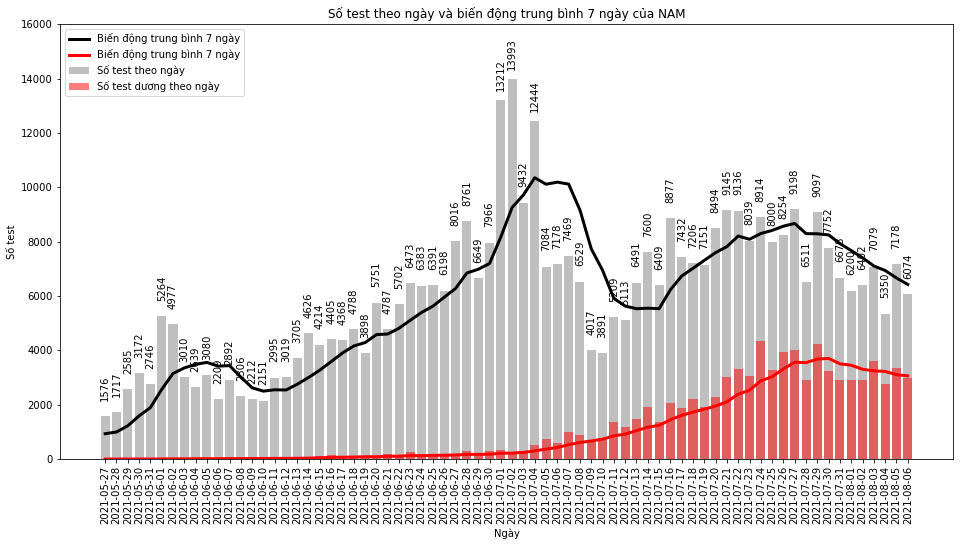

In [28]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1500, y[i].astype('int'), ha='center', va='top', rotation=90)
        
df = (
    ct_by_sex[(ct_by_sex.date_sample >= '2021-05-27')
              & (ct_by_sex.sex == 'NAM')]
    .set_index('date_sample')
)

df
        
fig, ax = plt.subplots(figsize=(16,8))

# [bar] So test theo ngay
ax.bar(
    df.index, df.no_test, 
    label='Số test theo ngày', linewidth=3, alpha=0.5, color='grey')
# [line] BDTB so test theo ngay
ax.plot(
    df.index, df.no_test_rollsum / 7, 
    label='Biến động trung bình 7 ngày', linewidth=3, color='black')

# [bar] So test duong theo ngay
ax.bar(df.index, df.no_positive,
       label='Số test dương theo ngày', linewidth=3, alpha=0.5, color='red')

# [line] BDTB so test duong theo ngay
ax.plot(df.index, df.no_positive_rollsum / 7,
        label='Biến động trung bình 7 ngày', linewidth=3, color='red')

ax.set_ylabel('Số test')
ax.set_ylim([0, 16000])
ax.set_xlabel('Ngày')
ax.set_xticks(df.index)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Số test theo ngày và biến động trung bình 7 ngày của ' + 'NAM')
ax.legend(loc='upper left')
addlabels(df.index, df.no_test)

In [29]:
ct_by_sex.sex.unique()[0]

'NAM'